# Quantum Fourier Transform Benchmark

In [1]:
low = 1
high = 27
samples = 10

In [2]:
import time
import random
import math

## PyQrack

In [3]:
%env QRACK_QUNITMULTI_DEVICES 1
from pyqrack import QrackSimulator, Pauli

def reverse_qrack(sim):
    start = 0
    end = sim.num_qubits() - 1
    while (start < end):
        sim.swap(start, end)
        start += 1
        end -= 1

env: QRACK_QUNITMULTI_DEVICES=1


### |0> initialization

In [4]:
def bench_qrack_0(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    # Permutation basis eigenstate initialization before QFT is "trivial" for Qrack.
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    reverse_qrack(sim)
    sim.iqft(qubits)
    sim.m_all()

    return time.perf_counter() - start

qrack_0_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack_0(n))

    qrack_0_results[n] = sum(width_results) / samples

print(qrack_0_results)

Device #0, Loaded binary from: /home/iamu/.qrack/qrack_ocl_dev_Intel(R)_UHD_Graphics_[0x9bc4].ir
Device #1, Loaded binary from: /home/iamu/.qrack/qrack_ocl_dev_NVIDIA_GeForce_RTX_3080_Laptop_GPU.ir
{1: 1.1362599616404623e-05, 2: 3.7915000211796725e-05, 3: 5.951270031800959e-05, 4: 6.925170055183116e-05, 5: 8.195890004571992e-05, 6: 9.964839955500793e-05, 7: 0.00013118549941282254, 8: 0.00014385059985215775, 9: 0.00017283180022786837, 10: 0.00018971130048157648, 11: 0.00034220509987790135, 12: 0.00036775689986825457, 13: 0.0003764530993066728, 14: 0.0004233704996295273, 15: 0.00047713120002299545, 16: 0.0005491977990459418, 17: 0.0005814039992401377, 18: 0.0006631850999838206, 19: 0.0006395727996277856, 20: 0.0007636173002538271, 21: 0.0007264202995429514, 22: 0.0008307762000185903, 23: 0.0008299355999042745, 24: 0.000990347800325253, 25: 0.0009539337999740383, 26: 0.0010550758008321282, 27: 0.0011388585993699963}


### Random 1-qubit unitary initialization

In [5]:
def bench_qrack(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    # Permutation basis eigenstate initialization before QFT is "trivial" for Qrack,
    # so we give it a realistic case instead.
    for i in range(n):
        # Initialize with uniformly random single qubit gates, across full width.
        sim.u(i, random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi))
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    reverse_qrack(sim)
    sim.iqft(qubits)
    sim.m_all()

    return time.perf_counter() - start

qrack_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack(n))

    qrack_results[n] = sum(width_results) / samples

print(qrack_results)

{1: 1.5832999997655862e-05, 2: 6.335760044748895e-05, 3: 0.0001408957989042392, 4: 0.00018536589959694538, 5: 0.00023005529983493033, 6: 0.000277539999660803, 7: 0.0003150681000988698, 8: 0.0004368797999632079, 9: 0.0005090136990475002, 10: 0.0006417586002498866, 11: 0.00124323919917515, 12: 0.0016050707999966107, 13: 0.0019403979003982386, 14: 0.002621045200430672, 15: 0.002689721899514552, 16: 0.0030519894000462953, 17: 0.0038760539002396397, 18: 0.004270579000149155, 19: 0.005643682200752664, 20: 0.00639531840060954, 21: 0.007957931400233065, 22: 0.011612936999517843, 23: 0.018033719600134647, 24: 0.029550162800660473, 25: 0.05035972120022052, 26: 0.09131467879924457, 27: 0.16841686269945058}


### GHZ state initialization

In [6]:
def bench_qrack(n):
    sim = QrackSimulator(n)
    sim.set_reactive_separate(False)
    sim.h(0)
    for i in range(n - 1):
        sim.mcx([i], i + 1)
    start = time.perf_counter()
    qubits = [i for i in range(n)]
    reverse_qrack(sim)
    sim.iqft(qubits)
    sim.m_all()

    return time.perf_counter() - start

qrack_k_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qrack(n))

    qrack_k_results[n] = sum(width_results) / samples

print(qrack_k_results)

{1: 4.2749100612127225e-05, 2: 3.576339950086549e-05, 3: 9.522780019324272e-05, 4: 0.00015098900112207048, 5: 0.0001208072997542331, 6: 0.00014376369981619063, 7: 0.00018950900011986959, 8: 0.00023885119953774846, 9: 0.00033914449995791073, 10: 0.0005849247005244252, 11: 0.0018387666998023633, 12: 0.00225622790021589, 13: 0.002514072799749556, 14: 0.0026681606999773067, 15: 0.0031143447999056662, 16: 0.003112724400125444, 17: 0.0035940603007475146, 18: 0.004547663799894508, 19: 0.005525621299966588, 20: 0.008840972000325565, 21: 0.01660100059998513, 22: 0.02975027000029513, 23: 0.05618724620071589, 24: 0.11004641059989809, 25: 0.22813426639986573, 26: 0.46570660960023813, 27: 0.9547292243005359}


## FFTW ("Classical" DFT)

In [7]:
import pyfftw
import numpy as np

# See https://blog.hpc.qmul.ac.uk/pyfftw.html
pyfftw.interfaces.cache.enable()
pyfftw.interfaces.cache.set_keepalive_time(60)
total_time = 0

### |0> initialization

In [8]:
fftw_0_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.zeros_aligned(2**n, dtype=np.complex64)
        io_array[0] = 1.
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.fft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_0_results[n] = sum(width_results) / samples

print(fftw_0_results)

{1: 5.988970078760758e-05, 2: 3.703499969560653e-05, 3: 3.603920085879508e-05, 4: 3.2368299798690714e-05, 5: 0.00012660320098802912, 6: 4.32839005952701e-05, 7: 3.547269989212509e-05, 8: 5.385980002756696e-05, 9: 3.4530800621723753e-05, 10: 3.478829967207275e-05, 11: 3.9527799526695165e-05, 12: 5.0474800082156436e-05, 13: 9.641929937060922e-05, 14: 0.00015978139963408468, 15: 0.0003182890999596566, 16: 0.0005513453001185553, 17: 0.0011548099995707163, 18: 0.0027895818999240873, 19: 0.0095878497002559, 20: 0.01751206349981658, 21: 0.04404313820014068, 22: 0.06527043039968702, 23: 0.11367653000052087, 24: 0.21522016930030077, 25: 0.4033786841995607, 26: 0.9755553636998229, 27: 1.9997383732999878}


### Random 1-qubit unitary initialization

In [9]:
fftw_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.empty_aligned(2**n, dtype=np.complex64)
        
        # Use Qrack to initialize the test case!
        sim = QrackSimulator(n)
        for i in range(n):
            # Initialize with uniformly random single qubit gates, across full width.
            sim.u(i, random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi), random.uniform(0, 4 * math.pi))
        ket = sim.out_ket()
        del sim
        for i in range(2**n):
            io_array[i] = ket[i]
        del ket
        
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.fft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_results[n] = sum(width_results) / samples

print(fftw_results)

{1: 3.104629977315199e-05, 2: 2.7393600248615257e-05, 3: 2.4578400552854873e-05, 4: 2.6405799508211204e-05, 5: 2.6854400493903087e-05, 6: 2.922349922300782e-05, 7: 3.159040024911519e-05, 8: 2.9427799745462835e-05, 9: 3.350870028953068e-05, 10: 3.617049951571971e-05, 11: 4.285809918656014e-05, 12: 5.3866301095695233e-05, 13: 7.202299930213485e-05, 14: 0.00012042569906043355, 15: 0.0002298531006090343, 16: 0.0004728151008748682, 17: 0.0009479836004175013, 18: 0.0021254620998661265, 19: 0.00816750670055626, 20: 0.015866833600375684, 21: 0.0338477289002185, 22: 0.06167103349944227, 23: 0.11600637750016177, 24: 0.2108199287995376, 25: 0.3935054243000195, 26: 1.0184095236993016, 27: 2.306504333900011}


### GHZ initialization

In [10]:
fftw_k_results = {}
for n in range(low, high + 1):
    width_results = []
    for i in range(samples):
        io_array = pyfftw.zeros_aligned(2**n, dtype=np.complex64)
        io_array[0] = 1 / math.sqrt(2)
        io_array[2**n - 1] = 1 / math.sqrt(2)
        start = time.perf_counter()
        pyfftw.interfaces.numpy_fft.fft(io_array, overwrite_input=True, threads = (16 if (n > 20) else 1))
        width_results.append(time.perf_counter() - start)

    fftw_k_results[n] = sum(width_results) / samples

print(fftw_k_results)

{1: 0.00018877249967772514, 2: 4.440589946170803e-05, 3: 4.202960080874618e-05, 4: 8.500039948557969e-05, 5: 3.567519997886848e-05, 6: 7.980710033734794e-05, 7: 1.8537300275056622e-05, 8: 3.731869983312208e-05, 9: 3.772960080823395e-05, 10: 2.0326600133557803e-05, 11: 6.45721003820654e-05, 12: 8.264740063168574e-05, 13: 9.785820002434775e-05, 14: 8.794809837127104e-05, 15: 0.0001697117000730941, 16: 0.0003858196010696702, 17: 0.0008327122006448918, 18: 0.0017241509995074011, 19: 0.00742591890048061, 20: 0.015917172899571598, 21: 0.04726534870060277, 22: 0.06304958479922788, 23: 0.11369455349922646, 24: 0.2096256552998966, 25: 0.3895138183997915, 26: 0.9239522981002665, 27: 1.8342753702003392}


## Qiskit Aer

In [11]:
from qiskit import QuantumCircuit
from qiskit import execute, Aer
from qiskit.providers.aer import QasmSimulator

def reverse_aer(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        circ.swap(start, end)
        start += 1
        end -= 1

# Implementation of the Quantum Fourier Transform
def aer_qft(num_qubits, circ):
    # Quantum Fourier Transform
    reverse_aer(num_qubits, circ)
    for j in reversed(range(num_qubits)):
        circ.h(j)
        for k in reversed(range(j)):
            circ.cp(-math.pi/float(2**(j-k)), j, k)
    for j in range(num_qubits):
        circ.measure(j, j)

    return circ

sim_backend = QasmSimulator(shots=1, method='statevector_gpu')

def bench_aer(num_qubits):
    circ = QuantumCircuit(num_qubits, num_qubits)
    aer_qft(num_qubits, circ)
    start = time.perf_counter()
    job = execute([circ], sim_backend, timeout=600)
    result = job.result()
    return time.perf_counter() - start

aer_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_aer(n))

    aer_results[n] = sum(width_results) / samples

print(aer_results)

{1: 0.025083300799815335, 2: 0.004287815800489625, 3: 0.004328436000287183, 4: 0.005153978499947698, 5: 0.005838923999544931, 6: 0.0065753212998970415, 7: 0.007334006900055101, 8: 0.008244343199476135, 9: 0.009470269699886558, 10: 0.010727168000812526, 11: 0.011539456899845391, 12: 0.012209904899646063, 13: 0.013126053500309353, 14: 0.013930694701048196, 15: 0.016341226199801894, 16: 0.01735427029998391, 17: 0.01918501650034159, 18: 0.02345843650000461, 19: 0.02449497879933915, 20: 0.03255862719961442, 21: 0.040774333399531314, 22: 0.06306568530053483, 23: 0.10262418579950464, 24: 0.1876025216992275, 25: 0.37828167419975217, 26: 0.7576090022994322, 27: 1.6004634250009986}


## Qulacs

In [12]:
import qulacs

def reverse_qulacs(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        circ.add_gate(qulacs.gate.SWAP(start, end))
        start += 1
        end -= 1

def get_rotz(exponent: float) -> np.ndarray:
    return np.diag([1., np.exp(1.j * np.pi * exponent)])

def bench_qulacs(n):
    sim = qulacs.QuantumStateGpu(n)
    circ = qulacs.QuantumCircuit(n)
    start = time.perf_counter()

    reverse_qulacs(n, circ)
    for j in reversed(range(n)):
        circ.add_gate(qulacs.gate.H(j))
        for k in reversed(range(j)):
            mat = get_rotz(-math.pi/float(2**(j-k)))
            gate = qulacs.gate.DenseMatrix(k, mat)
            gate.add_control_qubit(j, 1)
            circ.add_gate(gate)
    for index in range(n):
        circ.add_gate(qulacs.gate.Measurement(index, index))

    circ.update_quantum_state(sim)

    return time.perf_counter() - start

qulacs_results = {}
for n in range(low, high + 1):
    width_results = []
        
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qulacs(n))

    qulacs_results[n] = sum(width_results) / samples

print(qulacs_results)

{1: 0.00020370599995658267, 2: 0.00041354090026288757, 3: 0.0004759243001899449, 4: 0.0006150096996861976, 5: 0.0007341580992942908, 6: 0.000956114599830471, 7: 0.0011406052999518579, 8: 0.0014040372985618887, 9: 0.0016569134997553193, 10: 0.0019936090997362045, 11: 0.002363350500309025, 12: 0.0029254369994305305, 13: 0.00350034209950536, 14: 0.003824373099996592, 15: 0.004235278800479136, 16: 0.006801061801161268, 17: 0.010854100498909247, 18: 0.015189841199389775, 19: 0.023607936099506333, 20: 0.042947307899521545, 21: 0.08455043889916851, 22: 0.16708712590007052, 23: 0.34112889370044286, 24: 0.6671409070004302, 25: 1.3428897241992672, 26: 2.7116923314992163, 27: 5.514719266999964}


## QCGPU

In [13]:
%env PYOPENCL_CTX 1

env: PYOPENCL_CTX=1


In [14]:
import qcgpu

def swap_qcgpu(circ, q1, q2):
    circ.cx(q1, q2)
    circ.cx(q2, q1)
    circ.cx(q1, q2)
    
def reverse_qcgpu(num_qubits, circ):
    start = 0
    end = num_qubits - 1
    while (start < end):
        swap_qcgpu(circ, start, end)
        start += 1
        end -= 1

def bench_qcgpu(num_qubits):
    state = qcgpu.State(num_qubits)
    start = time.perf_counter()

    reverse_qcgpu(num_qubits, state)
    for j in reversed(range(num_qubits)):
        state.h(j)
        for k in reversed(range(j)):
            state.cu1(j, k, -math.pi/float(2**(j-k)))
    state.measure()

    state.backend.queue.finish()
    return time.perf_counter() - start

qcgpu_results = {}
for n in range(low, high + 1):
    width_results = []
         
    # Run the benchmarks
    for i in range(samples):
        width_results.append(bench_qcgpu(n))

    qcgpu_results[n] = sum(width_results) / samples

print(qcgpu_results)

{1: 0.0019438962001004257, 2: 0.0020238109998899747, 3: 0.0024793044998659753, 4: 0.004210107600374613, 5: 0.005023988299217308, 6: 0.006712620599500951, 7: 0.007948347499768716, 8: 0.009500959899742156, 9: 0.01099538379967271, 10: 0.013869702599549782, 11: 0.01635156770098547, 12: 0.01950070070088259, 13: 0.022134944499703123, 14: 0.025690701100756996, 15: 0.029262279799877434, 16: 0.03551039740013948, 17: 0.038276802598920766, 18: 0.04425062220034306, 19: 0.051034601900028065, 20: 0.06136824459899799, 21: 0.07994394800043665, 22: 0.10701571739955398, 23: 0.16900055400074052, 24: 0.34914693190003165, 25: 0.7208445381002093, 26: 1.4790578987991467, 27: 3.0693527873994753}


## Results

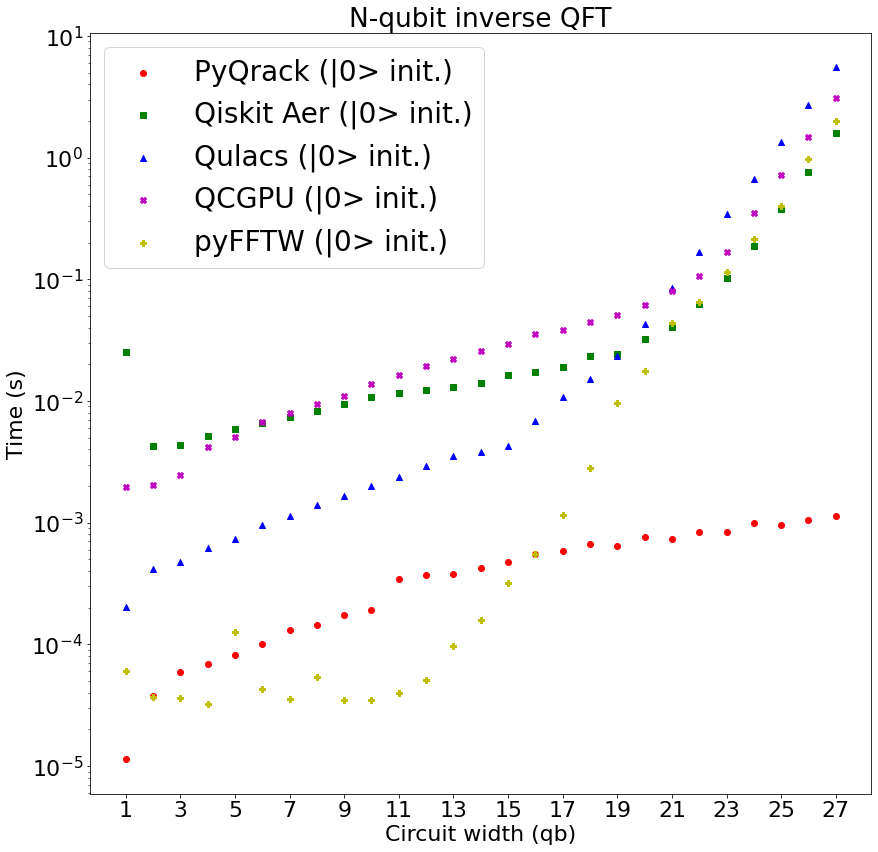

In [21]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=28)
plt.rcParams.update({'font.size': 22})

colors = list("kcymbgr")
markers = list("*PX^so")

x = qrack_0_results.keys()
y = qrack_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = aer_results.keys()
y = aer_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qulacs_results.keys()
y = qulacs_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qcgpu_results.keys()
y = qcgpu_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_0_results.keys()
y = fftw_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

plt.title("N-qubit inverse QFT")
plt.xlabel("Circuit width (qb)")
plt.ylabel("Time (s)")
plt.legend(["PyQrack (|0> init.)", "Qiskit Aer (|0> init.)", "Qulacs (|0> init.)", "QCGPU (|0> init.)", "pyFFTW (|0> init.)"])
plt.yscale("log")
plt.xticks(np.arange(low, high + 1, step=2))

plt.show()

fig.savefig('iqft_0_chart.png', dpi=100)

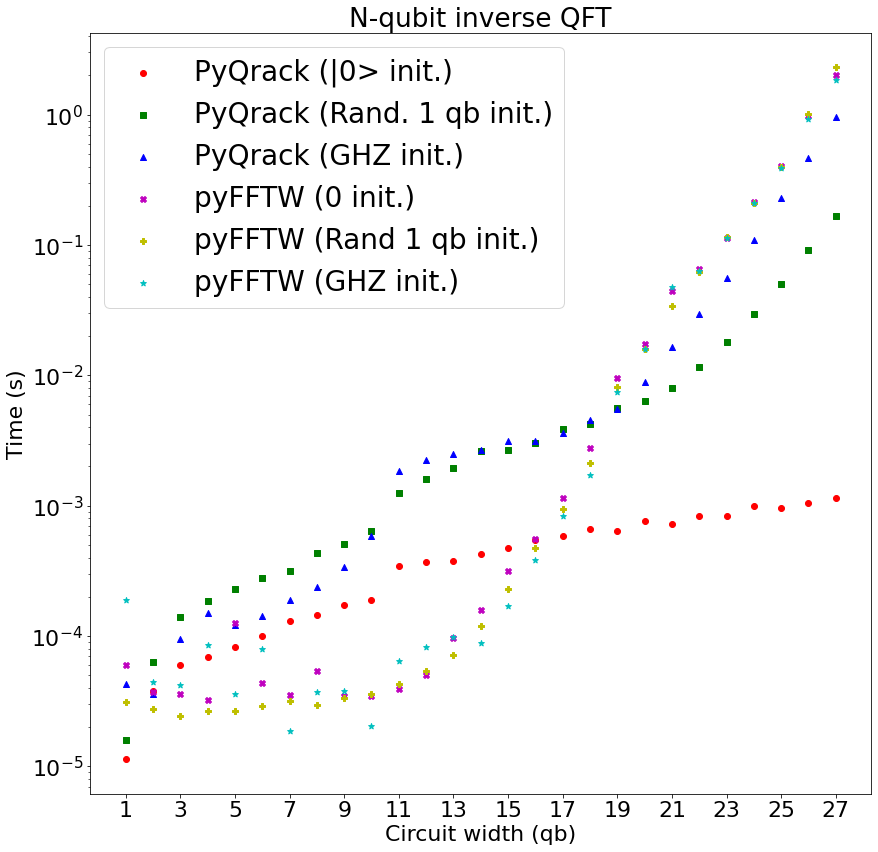

In [23]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=28)
plt.rcParams.update({'font.size': 22})

colors = list("cymbgr")
markers = list("*PX^so")

x = qrack_0_results.keys()
y = qrack_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qrack_results.keys()
y = qrack_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = qrack_k_results.keys()
y = qrack_k_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_0_results.keys()
y = fftw_0_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_results.keys()
y = fftw_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

x = fftw_k_results.keys()
y = fftw_k_results.values()
plt.scatter(x,y,color=colors.pop(),marker=markers.pop())

plt.title("N-qubit inverse QFT")
plt.xlabel("Circuit width (qb)")
plt.ylabel("Time (s)")
plt.legend(["PyQrack (|0> init.)", "PyQrack (Rand. 1 qb init.)", "PyQrack (GHZ init.)", "pyFFTW (0 init.)", "pyFFTW (Rand 1 qb init.)", "pyFFTW (GHZ init.)"])
plt.yscale("log")
plt.xticks(np.arange(low, high + 1, step=2))

plt.show()

fig.savefig('iqft_ghz_chart.png', dpi=100)

In [17]:
import platform

print(platform.machine())
print(platform.version())
print(platform.platform())
print(platform.uname())
print(platform.system())
print(platform.processor())

x86_64
#33~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Jan 30 17:03:34 UTC 2
Linux-5.19.0-32-generic-x86_64-with-glibc2.35
uname_result(system='Linux', node='sekhmet', release='5.19.0-32-generic', version='#33~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Jan 30 17:03:34 UTC 2', machine='x86_64')
Linux
x86_64


In [18]:
import subprocess

line_as_bytes = subprocess.check_output("nvidia-smi -L", shell=True)
line = line_as_bytes.decode("ascii")
_, line = line.split(":", 1)
line, _ = line.split("(")
print(line.strip())

NVIDIA GeForce RTX 3080 Laptop GPU


In [19]:
import cpuinfo
cpuinfo.get_cpu_info()['brand_raw']

'Intel(R) Core(TM) i9-10980HK CPU @ 2.40GHz'